In [1]:
## Collect features for TSNE
import glob, librosa

feature_vector1 = []
feature_vector2 = []

print('Reading abnormal heart sound...')
for file in glob.glob('./abnormal/*.wav'):
    y, fs = librosa.load(file)
    mfccs = librosa.feature.mfcc(y=y[:4*fs], n_mfcc=96)
    feature_vector1.append(mfccs.flatten())

print('Reading normal heart sound...')
for file in glob.glob('./normal/*.wav'):
    y, fs = librosa.load(file)
    mfccs = librosa.feature.mfcc(y=y[:4*fs], n_mfcc=96)
    feature_vector2.append(mfccs.flatten())

Reading abnormal heart sound...
Reading normal heart sound...


In [2]:
## Reduce to 2D by TSNE
from sklearn.manifold import TSNE

print('Processing abnormal features...')
model1 = TSNE().fit_transform(feature_vector1)

print('Processing normal features...')
model2 = TSNE().fit_transform(feature_vector2)

Processing abnormal features...
Processing normal features...


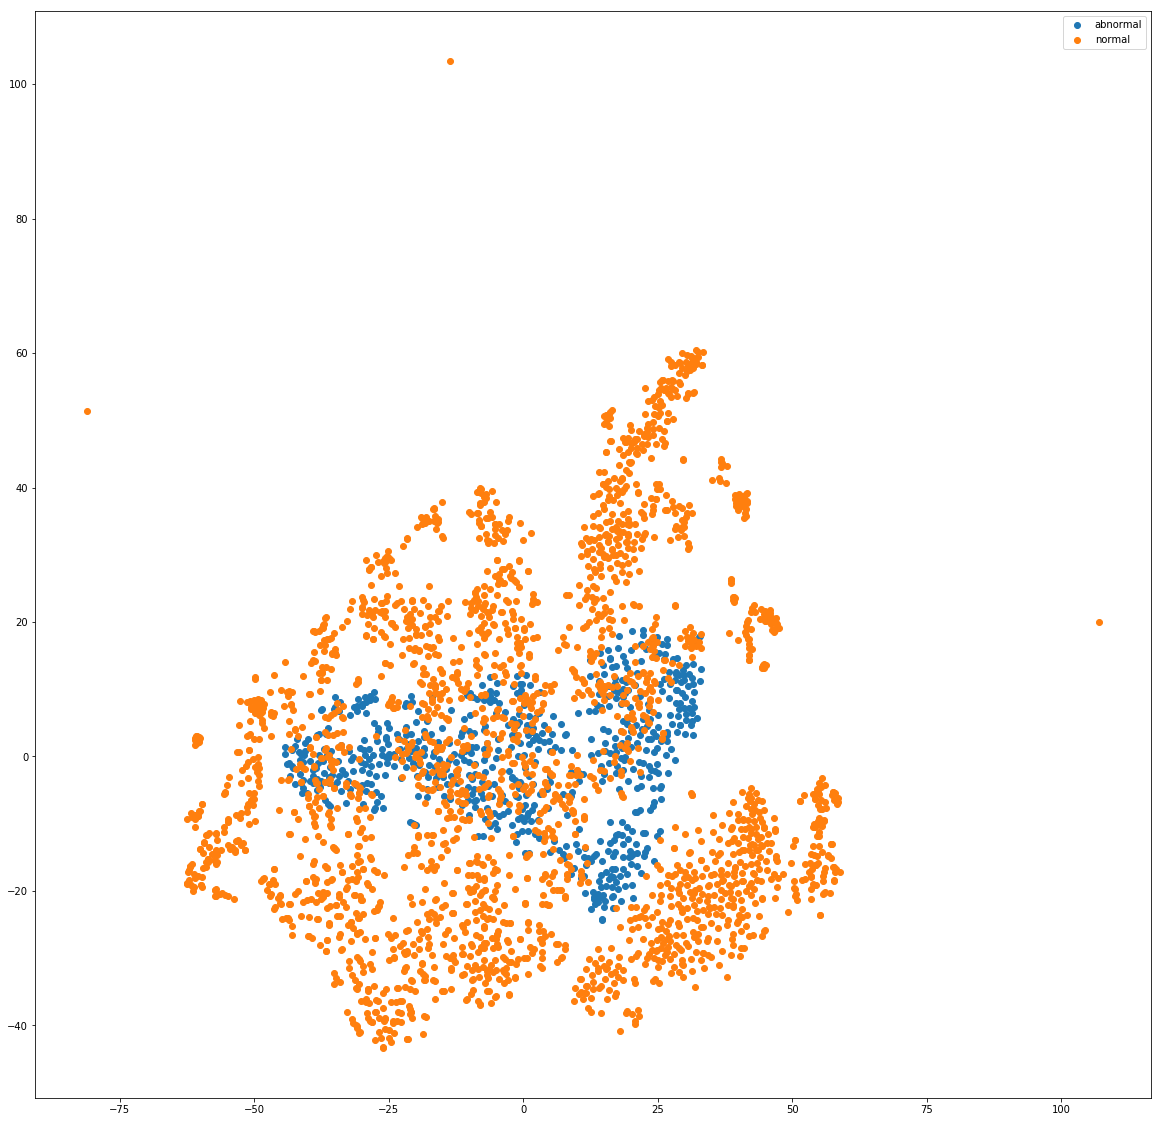

In [6]:
## Virtualize models
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (20,20))

x_axis1=model1[:,0]
y_axis1=model1[:,1]
plt.scatter(x_axis1, y_axis1)

x_axis2=model2[:,0]
y_axis2=model2[:,1]
plt.scatter(x_axis2, y_axis2)

plt.legend(['abnormal', 'normal'])
plt.savefig('./result.png')
plt.show()

In [5]:
%store feature_vector1
%store feature_vector2
%store model1
%store model2

Stored 'feature_vector1' (list)
Stored 'feature_vector2' (list)
Stored 'model1' (ndarray)
Stored 'model2' (ndarray)


In [2]:
%store -r feature_vector1
%store -r feature_vector2
%store -r model1
%store -r model2